In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

In [8]:
def robber_algorithm_greedy(df):

    bank_list = []
    SPEED = 30
    time_left = 24
    loot = 0
    current_pos = [[0,0]]
    
    df = df.rename(columns={"x_coordinate": "x", "y_coordinate": "y", "time (hr)": "time"})
    coord = df[["x", "y"]].to_numpy()

    while time_left > 0:
        ed = euclidean_distances(current_pos, coord)
        df["ed"] = pd.DataFrame(np.reshape(ed, 10000))
        df["cost"] = df.money / (df.ed / SPEED + df.time)
        idx = df.cost.idxmax()
        if time_left >= (df.ed[idx] / SPEED + df.time[idx]):
            loot += df.money[idx]
            bank_list.append(idx)
            df.money[idx] = 0
            time_left -= (df.ed[idx] / SPEED + df.time[idx])
            current_pos = [[df.x[idx],df.y[idx]]]
        else:
            break

    bank_list.reverse()
    return bank_list

In [9]:
df = pd.read_csv('bank_data.csv')
bank_list = robber_algorithm_greedy(df)

In [15]:
import math

def verify(travel_list):
    temp = pd.read_csv('bank_data.csv')
    plt.plot(df.x_coordinate[travel_list], df.y_coordinate[travel_list])
    print(f'{len(bank_list)} banks robbed for a total of {sum(temp.money[bank_list])} dollars')

237 banks robbed for a total of 14125900 dollars


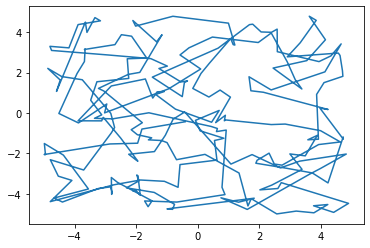

In [16]:
verify(bank_list)

In [17]:
import check_solution
df = pd.read_csv('bank_data.csv')
check_solution.check_solution(bank_list, df)

Time Remaining: 0.18575782954423525


14125900.0